## Projeto WPT (WIRELESS POWER TRANSFER)

Integrantes: Paola Friedel, Leandra Fontes, Taina Bomfim, Ana Beatriz

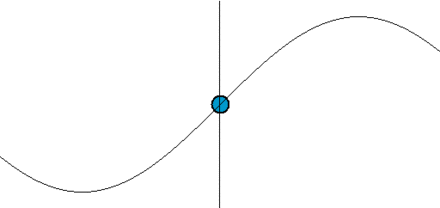

### Objetivo

O projeto WPT (WIRELESS POWER TRANSFER) consiste em um mecanismo de transmissão de energia sem fio, utilizando conceitos vistos em classe de eletromagnetismo e ondulatória.

### Elaboração do diagrama do modelo eletrodinâmico do circuito WPT

Circuito com um capacitor em série no primário e um em paralelo no secundário

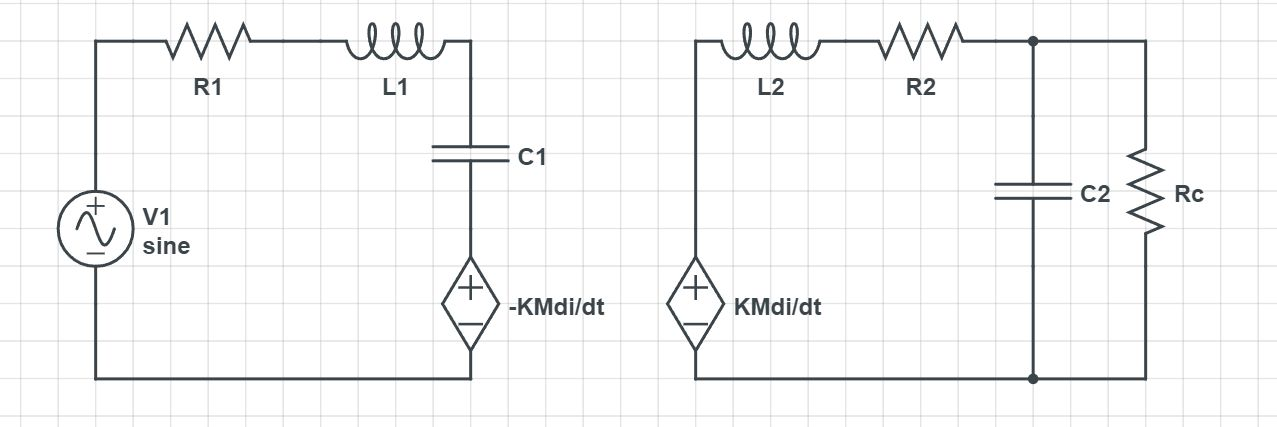

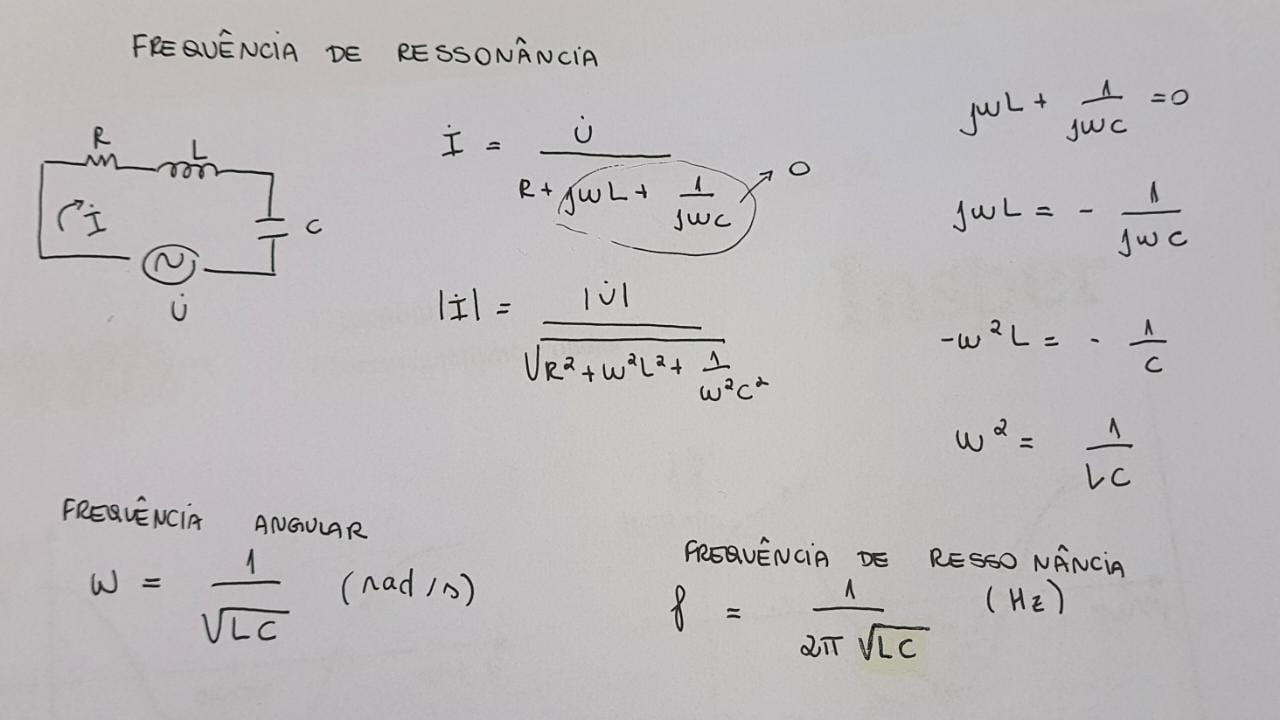

### Código do modelo numérico

In [2]:
# Importando Bibliotecas 
from cmath import *
from numpy import linalg
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Função para as correntes no transformador agora com o capacitor em série no primário e em paralelo no secundário
def CalcularTransformador(Uf, Rc, R1, R2, C, XL1, XL2, XM, w):
    XC = 1/(1j*w*C)
    Z = np.array([[R1+XL1+XC, -XM],[XM, -XL2-R2-(1/(1/XC+1/Rc))]])
    V = np.array([Uf,0])
    i = np.dot(linalg.inv(Z),V)
    return i[0], i[1]

# Função de ressonância 
def Reso(L1, L2, C):
    Reso1 = 1/(2*pi*sqrt(L1*C))
    Reso2 = 1/(2*pi*sqrt(L2*C))
    return Reso1, Reso2

# Função de indutância mútua 
def M(k, L1, L2): 
    return k*sqrt(L1*L2)

### Construção de gráficos de I1 e I2 em função da frequência

In [4]:
# Valores iniciais do transformador

# Escolhendo utilizar o fio do tipo AWG 16
# Dado que utilizamos o software Physika, obtivemos a quantidade de voltas necessárias para cada bobina
# Bobina 1: 25 voltas
# Bobina 2: 25 voltas

# Com isso, medimos o valor de indutância dessas bobinas, e obtivemos os seguintes valores:
L1 = 77e-6; L1_str = '77uH'
L2 = 72.16e-6; L2_str = '72.16uH'
R1 = 0.4
R2 = 0.417


Uf = 10/pi
C = 0.47e-6 # valor de capacitância escolhido arbitrariamente, de acordo com o que foi dito pelo professor Thiago Tolosa
f = abs(Reso(L1,L2,C)[1]) # valor de ressonância escolhido arbitrariamente, de acordo com o que foi dito pelo professor Thiago Tolosa
w = 2*pi*f # frequencia angular
K = 0.11
Rc = 100 # valor de resistência do capacitor escolhido arbitrariamente, de acordo com o que foi dito pelo professor Thiago Tolosa

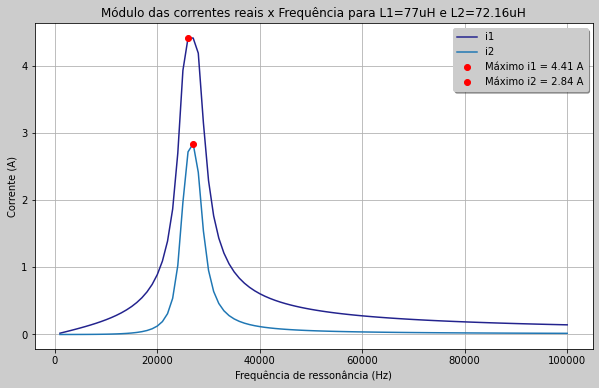

A indutância entre as bobinas reais é 8.19947998351115e-06

A frequência de ressonância é 27329 Hz!

Para a frequência de ressonância acima, os valores de corrente são:
    i1 = 1.994565645625116 A
    i2 = 1.4489158511956113 A


In [5]:
XL1=1j*w*L1 #Indutância 1
XL2=1J*w*L2 #Indutância 2 
XM=1j*w*M(K,L1,L2)# Indutância Mútua

V1 = Uf*2 # tensão de entrada no primário definida nas instruções do projeto

lista_frequencias=np.linspace(1e3, 100e3, 100) # range de valores dentro do intervalo de frequências de ressonância plausíveis

########################################################
# valores utilizados ANTES da medição da indutância    #
########################################################
lista_i1=[]; lista_i2=[] # listas para armazenar os valores de corrente no primário e no secundário
L = 77e-6 # valor estimado de indutância
for freq in lista_frequencias: 
    #recalculando com base em cada valor da lista de frequências 
    w_2=2*pi*freq # frequencia angular variável 
    R1_2=0.4+0.15#0.5+0.5*5*freq/100e3 # Resistor no primário 
    R2_2=0.417+0.15#0.5+0.5*5*freq/100e3 # Resistor no secundário
    X_L = 1j*w_2*L # Indutância
    XM_2=1j*w_2*M(K, L, L) # Indutância Mútua
    i1, i2 = CalcularTransformador(V1, Rc, R1_2, R2_2, C, X_L, X_L, XM_2, w_2) #correntes no primário e no secundário
    lista_i1.append(abs(i1))
    lista_i2.append(abs(i2))

########################################################
# valores utilizados DEPOIS da medição da indutância   #
########################################################
lista_i1=[]; lista_i2=[] # listas para armazenar os valores de corrente no primário e no secundário
for freq in lista_frequencias: 
    w_2=2*pi*freq # frequencia angular variável 
    R1_2=0.4+0.15#0.5+0.5*5*freq/100e3 #Resistor no primário 
    R2_2=0.417+0.15#0.5+0.5*5*freq/100e3 #Resistor no secundário
    X_L = 1j*w_2*L # Indutância
    XM_2=1j*w_2*M(K, L, L) # Indutância Mútua
    i1, i2 = CalcularTransformador(V1, Rc, R1_2, R2_2, C, X_L, X_L, XM_2, w_2) #correntes no primário e no secundário
    lista_i1.append(abs(i1))
    lista_i2.append(abs(i2))

max_i1 = max(lista_i1); max_i2 = max(lista_i2) # valores máximos de corrente no primário e no secundário
i_max_i1 = lista_i1.index(max_i1); i_max_i2 = lista_i2.index(max_i2) # índices dos valores máximos de corrente no primário e no secundário

plt.figure(facecolor="#CCCCCC", figsize=(10,6))
plt.plot(lista_frequencias, lista_i1, label='i1', color='#23238E')
plt.plot(lista_frequencias, lista_i2, label='i2')
plt.plot(lista_frequencias[i_max_i1], max_i1, 'ro', label=f'Máximo i1 = {max_i1:.2f} A')
plt.plot(lista_frequencias[i_max_i2], max_i2, 'ro', label=f'Máximo i2 = {max_i2:.2f} A')
plt.title(f"Módulo das correntes reais x Frequência para L1={L1_str} e L2={L2_str}")
plt.xlabel("Frequência de ressonância (Hz)")
plt.ylabel("Corrente (A)")
plt.legend(loc='upper right', facecolor="#CCCCCC",shadow=True)
plt.grid(True)
plt.show()

print('A indutância entre as bobinas reais é', abs(M(K,L1,L2)))
print("\nA frequência de ressonância é {:.0f} Hz!".format(abs(Reso(L1,L2,C)[1])))
print('\nPara a frequência de ressonância acima, os valores de corrente são:')
print('    i1 = {} A'.format(abs(CalcularTransformador(Uf, Rc, R1, R2, C, XL1, XL2, XM, w)[0])))
print('    i2 = {} A'.format(abs(CalcularTransformador(Uf, Rc, R1, R2, C, XL1, XL2, XM, w)[1])))

### Construção de um gráfico do módulo da tensão 𝑉2 pela frequência de ressonância, para 6 diferentes indutâncias

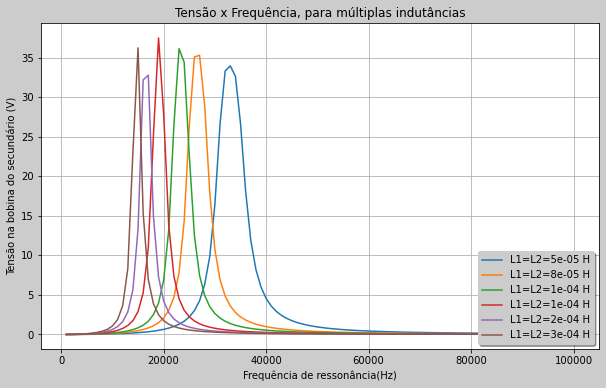

In [6]:
list_indutancias=[50e-6, 77e-6, 100e-6, 150e-6, 200e-6, 250e-6]
lista_frequencias=np.linspace(1e3, 100e3, 100)

plt.figure(facecolor="#CCCCCC",figsize=(10,6))

for L in list_indutancias: 
    L1_2=L #Indutor no primário 
    L2_2=L #Indutor no secundário 
    lista_Ufs=[]
    for freq in lista_frequencias: 
        #recalculando com base em cada valor da lista de frequências 
        w_2=2*pi*freq # frequencia angular variável 
        XC = 1/(1j*w_2*C)
        R1_2=0.4+0.15#0.5+0.5*5*freq/100e3 #Resistor no primário 
        R2_2=0.417+0.15#0.5+0.5*5*freq/100e3 #Resistor no secundário
        XL=1j*w_2*L1_2 #Indutância 1
        XM_2=1j*w_2*M(K, L1_2, L2_2) #Indutância Mútua
        i1, i2 = CalcularTransformador(V1, Rc, R1_2, R2_2, C, XL, XL, XM_2, w_2) #correntes no primário e no secundário
        Resistencia_equivalente=1/(1/Rc+1/XC) 
        Vsaida=Resistencia_equivalente*i2  #tensão de saída no secundário 
        lista_Ufs.append(abs(Vsaida)) #lista com os valores de tensão no secundário
    
    plt.plot(lista_frequencias,lista_Ufs, label="L1=L2=%.0e H" %L)

plt.xlabel("Frequência de ressonância(Hz)")
plt.ylabel("Tensão na bobina do secundário (V)")
plt.title("Tensão x Frequência, para múltiplas indutâncias")
plt.legend(loc='lower right', facecolor="#CCCCCC",shadow=True)
plt.grid(True)
plt.show()

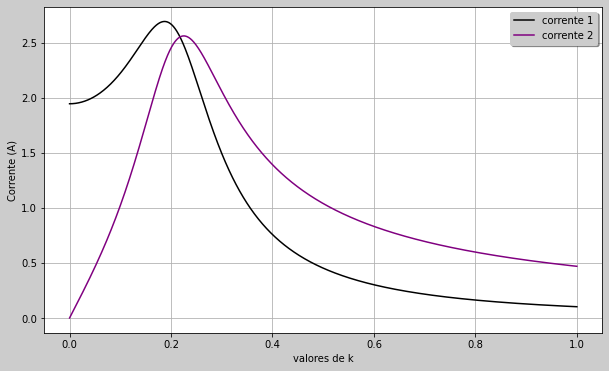

In [7]:
#considerando uma dada frequencia e indutancia fixas
freq=30e3 #Hz
L1=77e-6
L2=72.16e-6

w_2=2*pi*freq #frequencia angular variável 
#recalculando com base em cada valor da lista de frequências 
C_2 = 0.47e-6
R1_2=0.4+0.15
R2_2=0.415+0.15
XL1_2=1j*w_2*L1#Indutância 1
XL2_2=1J*w_2*L2 #Indutãncia 2
V1=20/pi
lista_ks=np.linspace(0,1,1000)

lista_i1=[]
lista_i2=[]
for k_2 in lista_ks:
    XM_3=1j*w_2*M(k_2,L1,L2) #Indutância Mútua
    i1,i2=CalcularTransformador(V1, Rc, R1_2, R2_2, C_2, XL1_2, XL2_2, XM_3, w_2)
    lista_i1.append(abs(i1))
    lista_i2.append(abs(i2))
plt.figure(facecolor="#CCCCCC", figsize=(10,6))
plt.plot(lista_ks, lista_i1, label='corrente 1', color='black')
plt.plot(lista_ks, lista_i2, label='corrente 2', color='purple')
plt.xlabel('valores de k')
plt.ylabel('Corrente (A)')
plt.legend(loc='upper right', facecolor="#CCCCCC",shadow=True)
plt.grid(True)

### Atividade 5


In [8]:

def index(lista_valores, lista_x): 
    for i in range(len(lista_valores)):
        if lista_valores[i]==max(lista_valores):
                  return lista_x[i]

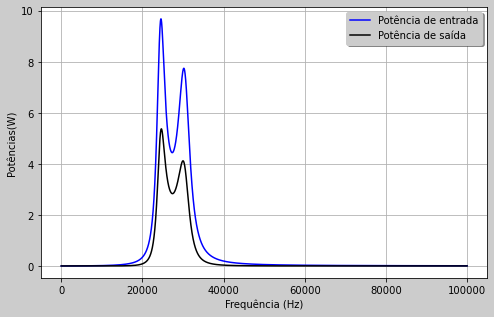

5.372842019603535


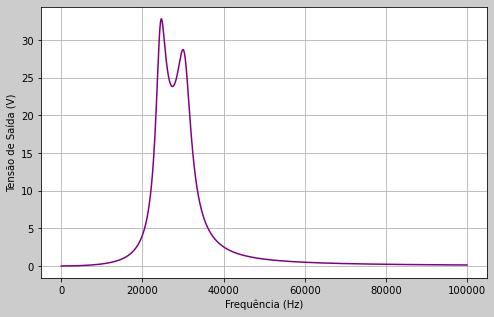

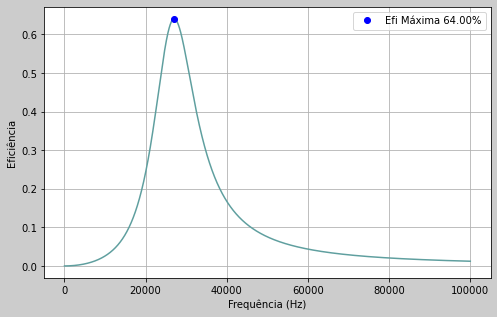

In [9]:
V1=(10*2)/pi
k_3=0.225225225225
Rc=100

lista_V2_saida=[]
lista_potencia_entrada=[]
lista_potencia_saida=[]
lista_eficiencia=[]

lista_freq=np.arange(10,100000, 10)

for freq in lista_freq: 
    R1=0.4+0.15
    R2=0.417+0.15
    w_3=2*pi*freq
    C_3 = 0.47e-6
    L1_3=77e-6
    L2_3=72.16e-6
    XL1_3= 1j*w_3*L1_3
    XL2_3=1j*w_3*L2_3
    XM_3=1j*w_3*M(k_3,L1_3,L2_3)    
    i1_3, i2_3=CalcularTransformador(V1, Rc, R1, R2, C_3, XL1_3, XL2_3, XM_3, w_3) 
    Sprima=V1/sqrt(2)*i1_3.conjugate()/sqrt(2)
    #print(Sprima)
    lista_potencia_entrada.append(Sprima.real)
    XC_3=1/(1j*w_3*C_3)
    Zeq=1/(1/XC_3+1/Rc)
    V2_saida=Zeq*i2_3
    #print(V2_saida)
    lista_V2_saida.append(abs(V2_saida))
    Ic=V2_saida/Rc
    S_secun=V2_saida/sqrt(2)*(Ic.conjugate()/sqrt(2))
    #print(S_secun)
    lista_potencia_saida.append(S_secun.real)
    lista_eficiencia.append(S_secun.real/Sprima.real)
plt.figure(facecolor="#CCCCCC", figsize=(8,5))   
plt.plot(lista_freq, lista_potencia_entrada, label='Potência de entrada', color='blue')
plt.plot(lista_freq, lista_potencia_saida, label='Potência de saída', color='black')
plt.title('')
plt.xlabel('Frequência (Hz)')
plt.legend(loc='upper right', facecolor="#CCCCCC",shadow=True)
plt.ylabel('Potências(W)')
plt.grid(True)
plt.show()
print(max(lista_potencia_saida))

plt.figure(facecolor="#CCCCCC", figsize=(8,5))
plt.plot(lista_freq, lista_V2_saida, color='purple')
plt.title('')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Tensão de Saída (V)')
plt.grid(True)
plt.show()

plt.figure(facecolor="#CCCCCC", figsize=(8,5))
plt.plot(lista_freq, lista_eficiencia, color="#5F9F9F")
plt.plot(index( lista_eficiencia,lista_freq), max(lista_eficiencia), 'bo', label="Efi Máxima {:.2f}%".format(100*max(lista_eficiencia)))
plt.title('')
plt.legend()
plt.xlabel('Frequência (Hz)')
plt.ylabel('Eficiência')
plt.grid(True)
plt.show()

Construção de um gráfico que relacione o valor de pico da tensão no secundário (no resistor 𝑅𝐶) com 
o coeficiente de acoplamento 𝑘: para essa atividade, use a frequência de ressonância natural do 
conjunto 𝐿𝐶, que ficará fixa para diferentes valores de 𝑘. A ideia, com a simulação, é identificar se existe 
um fator de acoplamento ótimo, com o qual a tensão no secundário é máxima (e, por conseguinte, a 
potência recebida também será máxima).

In [10]:
l_tensao=[17.3,26.1,28.3,26.9,18.5,12.1,9.6,7.2,6,4.8,3.6]
l_dist =[2,3,3.5,4,5,6,7,8,9,10,11]
new_k=[]
for a in l_dist: 
    new_k.append((a*0.225225225225)/3.5)
              


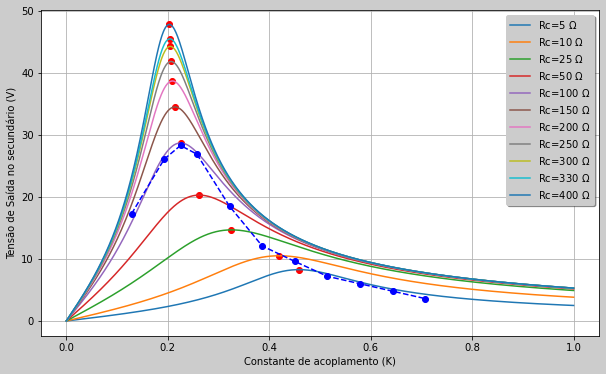

In [17]:
lista_ks=np.linspace(0,1,1000)

lista_resistencia_carga=[5,10,25,50,100,150,200,250,300,330,400]
#lista_resistencia_carga=[100]
lista_value_ks=[]
lista_value_picos=[]
freq=30e3
w_3=2*pi*freq
R1_3=0.4+0.15
R2_3=0.417+0.15
        
L1_3=77e-6
L2_3=72.16e-6
XC_3=1/(1j*w_3*C)
XL1_3= 1j*w_3*L1_3
XL2_3=1j*w_3*L2_3

V1=(10*2)/pi
plt.figure(facecolor="#CCCCCC", figsize=(10,6))
for Rc in lista_resistencia_carga:
    lista_picos=[]
    
    for k_3 in lista_ks:
        XM_3=1j*w_3*M(k_3,L1_3,L2_3)    
        i1_3, i2_3=CalcularTransformador(V1, Rc, R1_3, R2_3, C, XL1_3, XL2_3, XM_3, w_3) 
        Zeq=1/(1/XC_3+1/Rc)
        V2_saida=Zeq*i2_3
        lista_picos.append(abs(V2_saida))
    lista_value_picos.append(max(lista_picos))
    lista_value_ks.append(index(lista_picos, lista_ks))
    plt.plot(index(lista_picos, lista_ks),max(lista_picos),  'r-o')
    plt.plot(lista_ks, lista_picos, label="Rc=%0.f $\Omega$" %Rc)


#print("O valor do coeficiente de acoplamento para a tensão máxima é: {}".format(index(lista_picos, lista_ks)))

plt.xlabel('Constante de acoplamento (K)')
plt.plot(new_k,l_tensao,'b--o')
plt.ylabel('Tensão de Saída no secundário (V)')
plt.legend(loc='upper right', facecolor="#CCCCCC",shadow=True)
plt.grid(True)
plt.show()


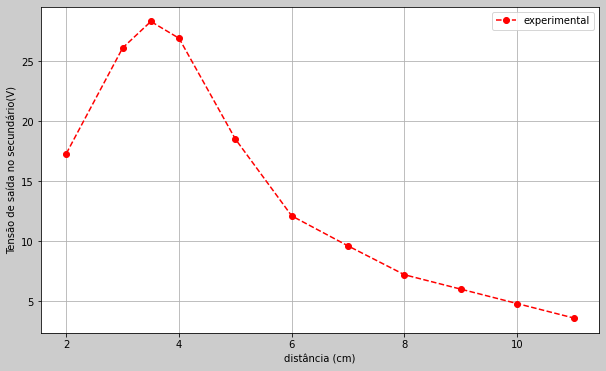

In [18]:
plt.figure(facecolor="#CCCCCC", figsize=(10,6))
plt.plot( l_dist,l_tensao, 'r--o',label="experimental")
plt.xlabel("distância (cm)")
plt.legend()
plt.ylabel("Tensão de saída no secundário(V)")
plt.title("")
plt.grid(True)
plt.show()

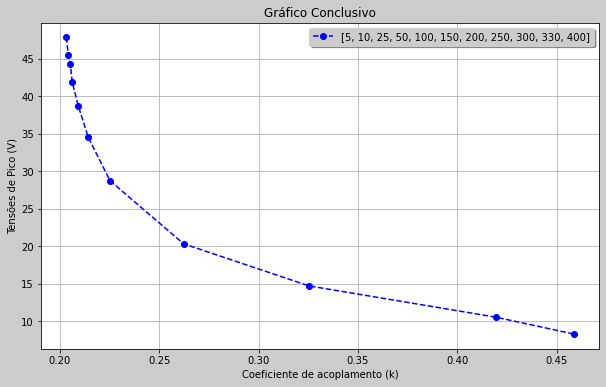

In [20]:
#gráfico de validação 
plt.figure(facecolor="#CCCCCC", figsize=(10,6))
plt.plot(lista_value_ks, lista_value_picos,'b--o', label=lista_resistencia_carga)
plt.xlabel('Coeficiente de acoplamento (k)')
plt.ylabel('Tensões de Pico (V)')
plt.legend(loc='upper right', facecolor="#CCCCCC",shadow=True)
plt.title('Gráfico Conclusivo')
plt.grid(True)
plt.show()